# Linear Regression Project 

## Problem Statement
This project aims at investigating the socio-economic factors that affect life expectancy across several countries, using Linear Regression.

## Linear Regression
Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.
Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. 
In this project Multiple Linear Regression technique has been used where we have one dependent variable and two or more independent variables. 

## Python libraries
The basic Python libraries used in this project are:-

• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.

In [ ]:
# !pip install statsmodels==0.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 53.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import scipy.stats as stats
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Importing dataset 

The original source of the dataset is WHO (World Health Organization). From the source of the dataset, it is observed that data on life expectancy and health factors for 193 nations was gathered from the WHO data repository website, while economic data is gathered from the United Nations website. Only the most relevant important points were picked from all categories of health-related factors.

In [ ]:
data = pd.read_csv("Life_exp.csv")

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279620,65.0,1154,...,6.0,8.16,65.0,0.1,584.25920,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523580,62.0,492,...,58.0,8.18,62.0,0.1,612.69650,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219240,64.0,430,...,62.0,8.13,64.0,0.1,631.74500,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184220,67.0,2787,...,67.0,8.52,67.0,0.1,669.95900,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.53723,2978599.0,18.2,18.2,0.454,9.5


## Understanding the Data

In [ ]:
data.shape

(2938, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251288,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158519,1.275247e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914824,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169394,6.096463e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685342,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935625,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912905,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947500,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534125,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806250,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.910000,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.700000,1.290000e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
data.duplicated().sum()

0

### Observations 

1) The column 'thinness 1-19 years' seems to have a typing error. It should ideally be 'thinness 10-19 years'.

2) The population column has huge values in it so we can scale it down.

3) Infant deaths and under five deaths have a minimum value of 0 which doesn't seem like a real world scenario.

4) The BMI column has some absurd values like 1 and 87.3 which have to be taken care of.

5) We may drop the column 'Country' because when predicting the Life Expectancy, the estimator needs to estimate based on the presented numerical data, such as adult mortality, GDP, population, etc., without being informed what country it is.



In [ ]:
data.rename(columns={'thinness 1-19 years':'thinness 10-19 years'}, inplace=True)
data['Population'] = data['Population']/1000000
data = data.drop(columns='Country', axis=1, inplace=False)

## Data Preprocessing 

### 1. Dealing with missing values 

There are few things that must be done concerning missing values:

- Detection of missing values: We check whether a null could be signified by anything other than null, perhaps zero values. 

- Dealing with missing values : We can fill the null values by either imputing or interpolating. If the data allows, we can also eliminate the null values.


In [ ]:

## We replace the error values (values with entry '0' or absurd value for a specific feature) with null values which will further be dealt with during the treatment of missing values. 

data['infant deaths'] = data['infant deaths'].replace(0, np.nan)
data.BMI = data.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 64.3) else x.BMI, axis=1)
data['under-five deaths'] = data['under-five deaths'].replace(0, np.nan)

In [ ]:
len(data)

2938

<AxesSubplot: >

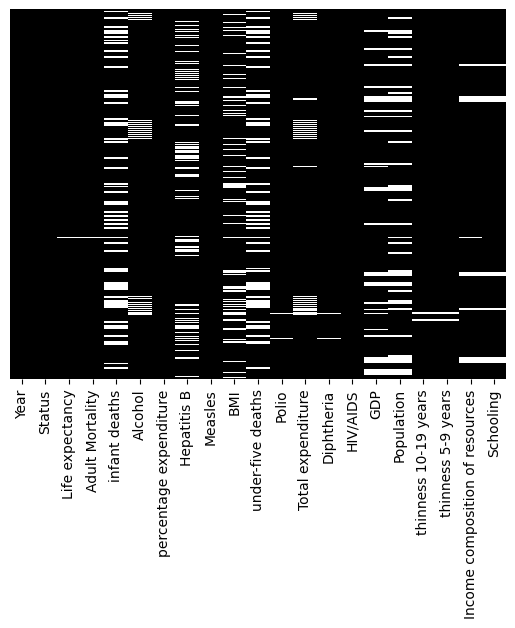

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='binary_r')

In [ ]:
missing_alcohol_years = data.loc[data['Alcohol'].isnull(), 'Year']

# Display the result
(missing_alcohol_years == 2015).sum()

177

In [ ]:
missing_exp_years = data.loc[data['Total expenditure'].isnull(), 'Year']

# Display the result
(missing_exp_years == 2015).sum()

181

In [ ]:
data.isnull().sum().sort_values(ascending=False)

infant deaths                      848
under-five deaths                  785
Population                         652
Hepatitis B                        553
BMI                                477
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 10-19 years                34
thinness 5-9 years                  34
Polio                               19
Diphtheria                          19
Adult Mortality                     10
Life expectancy                     10
Status                               0
Measles                              0
HIV/AIDS                             0
percentage expenditure               0
Year                                 0
dtype: int64

We decided to use KNN Algorithm to impute the missing values in these variables. But before we could go ahead and perform KNN, we will scale the variables because KNN being a distance based algorithm gets highly affected by difference in the scales of independent features. 

### Robust Scaling 

The scaling technique that we're gonna use is Robust Scaler. Robust scaling is a data normalization technique used to scale numerical features in a dataset. It is particularly useful when dealing with data that contains outliers or is not normally distributed.

The robust scaling method is robust to outliers because it uses statistical measures that are resistant to extreme values. Instead of using the mean and standard deviation like in standard scaling, robust scaling utilizes the median and the interquartile range (IQR) to estimate the center and spread of the data.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Separate the features (x) and the target variable (y)
x = data.drop(["Life expectancy","Status","Year"], axis=1)
y = data["Life expectancy"]

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the features (x) data
x_scaled = scaler.fit_transform(x)

# Create a new DataFrame with the scaled features and the target variable
data_scaled = pd.DataFrame(x_scaled, columns=x.columns)
data_scaled["Life expectancy"] = y
data_scaled["Status"]=data["Status"]
data_scaled["Year"]=data["Year"]
# Print the scaled DataFrame
data_scaled.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Status,Year
0,0.772727,1.709677,-0.548718,0.014574,-1.35,3.156142,-0.789634,1.674419,-4.578947,0.744006,...,0.0,-0.217132,4.477771,2.482143,2.456140,-0.692308,-0.523810,65.0,Developing,2015
1,0.824675,1.774194,-0.548718,0.019711,-1.50,1.318529,-0.804878,1.744186,-1.842105,0.750193,...,0.0,-0.211911,-0.146578,2.535714,2.491228,-0.702797,-0.547619,59.9,Developing,2014
2,0.805195,1.838710,-0.548718,0.019014,-1.40,1.146426,-0.820122,1.813953,-1.631579,0.734725,...,0.0,-0.208414,4.200273,2.571429,2.526316,-0.723776,-0.571429,59.9,Developing,2013
3,0.831169,1.935484,-0.548718,0.030380,-1.25,7.689105,-0.835366,1.906977,-1.368421,0.855375,...,0.0,-0.201398,0.319800,2.607143,2.578947,-0.748252,-0.595238,59.5,Developing,2012
4,0.850649,2.000000,-0.548718,-0.132347,-1.20,8.316447,-0.847561,2.000000,-1.315789,0.654292,...,0.0,-0.312732,0.220367,2.660714,2.614035,-0.779720,-0.666667,59.2,Developing,2011


In [ ]:
data_scaled.isnull().sum()

Adult Mortality                     10
infant deaths                      848
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                477
under-five deaths                  785
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
Status                               0
Year                                 0
dtype: int64

We can see that the response variable "Life expectancy" has 10 missing values. It is best if we remove these values as imputing values in the target variable only adds to the artificial increase in relationships with the independent variables.

We will also drop the missing values from the columns Status and Year since they are categorical in nature and we won't use KNN to impute the values.

In [ ]:
data_scaled = data_scaled.dropna(subset=['Life expectancy','Status','Year'])

In [ ]:
data_scaled.describe()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Year
count,2928.000000,2090.000000,2735.000000,2928.000000,2375.000000,2928.000000,2460.000000,2153.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2284.000000,2896.000000,2896.000000,2768.000000,2768.000000,2928.000000,2928.00000
mean,0.135042,1.083856,0.125986,1.546092,-0.551958,6.692175,-0.145536,1.078193,-0.550090,0.054188,-0.562031,2.353874,1.051478,1.574778,0.276897,0.277443,-0.173361,-0.071515,69.224932,2007.50000
std,0.807091,4.449723,0.593516,4.557482,1.250917,31.883334,0.510464,4.304121,1.232457,0.768221,1.247718,7.265061,2.622102,8.442052,0.789434,0.791159,0.737686,0.796771,9.523867,4.61056
min,-0.928571,-0.258065,-0.548718,-0.148594,-4.550000,-0.047189,-1.030488,-0.232558,-4.736842,-1.665893,-4.789474,0.000000,-0.324088,-0.191916,-0.571429,-0.561404,-2.367133,-2.928571,36.300000,2000.00000
25%,-0.454545,-0.225806,-0.417582,-0.137482,-0.750000,-0.047189,-0.673780,-0.186047,-0.789474,-0.462490,-0.789474,0.000000,-0.239237,-0.164698,-0.303571,-0.302632,-0.643357,-0.523810,63.100000,2003.75000
50%,0.000000,0.000000,0.002198,0.001599,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001547,0.000000,0.000000,-0.000362,0.000722,0.000000,0.017544,0.000000,0.000000,72.100000,2007.50000
75%,0.545455,0.774194,0.580220,0.864604,0.250000,0.958362,0.326220,0.813953,0.210526,0.536736,0.210526,1.000000,0.764834,0.836065,0.696429,0.684211,0.357517,0.476190,75.700000,2011.25000
max,3.759740,57.774194,2.068132,44.443290,0.350000,588.941013,0.588415,57.883721,0.315789,3.664346,0.315789,72.142857,21.554717,178.365524,4.357143,4.438596,0.947552,2.000000,89.000000,2015.00000


### Using KNN Imputation to impute the missing values.

Now that we have scaled all the variables, we will use KNN to impute all the missing values.

K-Nearest Neighbors (KNN) imputation is a technique used to fill in missing values in a dataset based on the values of its neighboring data points. It is a simple and intuitive imputation method that imputes missing values by finding the most similar data points (neighbors) to the ones with missing values and using their values to fill in the missing entries.

Assumptions:

- Local structure assumption: KNN assumes that data points that are close to each other in the feature space have similar characteristics. It assumes that neighboring data points provide relevant information for imputation.

- Feature relevance assumption: KNN assumes that the features used for imputation are relevant and informative in determining the value of the missing data point. Irrelevant or noisy features may lead to less accurate imputations.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
            'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'GDP', 'Population', 'thinness 10-19 years',
            'thinness 5-9 years', 'Income composition of resources', 'Schooling']

data1 = data_scaled.copy()
imputer = KNNImputer(n_neighbors=5, weights='distance')
data1[features] = imputer.fit_transform(data1[features])
data1.head()


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Status,Year
0,0.772727,1.709677,-0.548718,0.014574,-1.35,3.156142,-0.789634,1.674419,-4.578947,0.744006,...,0.0,-0.217132,4.477771,2.482143,2.456140,-0.692308,-0.523810,65.0,Developing,2015
1,0.824675,1.774194,-0.548718,0.019711,-1.50,1.318529,-0.804878,1.744186,-1.842105,0.750193,...,0.0,-0.211911,-0.146578,2.535714,2.491228,-0.702797,-0.547619,59.9,Developing,2014
2,0.805195,1.838710,-0.548718,0.019014,-1.40,1.146426,-0.820122,1.813953,-1.631579,0.734725,...,0.0,-0.208414,4.200273,2.571429,2.526316,-0.723776,-0.571429,59.9,Developing,2013
3,0.831169,1.935484,-0.548718,0.030380,-1.25,7.689105,-0.835366,1.906977,-1.368421,0.855375,...,0.0,-0.201398,0.319800,2.607143,2.578947,-0.748252,-0.595238,59.5,Developing,2012
4,0.850649,2.000000,-0.548718,-0.132347,-1.20,8.316447,-0.847561,2.000000,-1.315789,0.654292,...,0.0,-0.312732,0.220367,2.660714,2.614035,-0.779720,-0.666667,59.2,Developing,2011


In [ ]:
data1.isnull().sum()*100/len(data1)

Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness 10-19 years               0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
Life expectancy                    0.0
Status                             0.0
Year                               0.0
dtype: float64

Now, we will check the distribution of features before and after imputation. Also, analyse the skewness and kurtosis in both scenarios to understand the impact of imputation on each variable.

In [ ]:
color_pal = sns.color_palette(palette='muted')
def draw_histplot():
    f, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(24, len(features)*6))
    for x in range(0, len(features)):
        sns.histplot(data, x=features[x], kde=True, ax=axes[x, 0], color=color_pal[0])
        sns.histplot(data1, x=features[x], kde=True, ax=axes[x, 1], color=color_pal[1])
    for i, ax in enumerate(axes.reshape(-1)):
        if i % 2 == 0:
            selected_title = 'Before Imputation'
            selected_data = data[features[int(i/2)]].dropna()
        elif i % 2 == 1:
            selected_title = 'KNN Imputation'
            selected_data = data1[features[int(i/2)]]
        ax.set_title(selected_title)
        ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % skew(selected_data),\
            fontsize=9, verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(selected_data),\
            fontsize=9, verticalalignment='top', horizontalalignment='right')

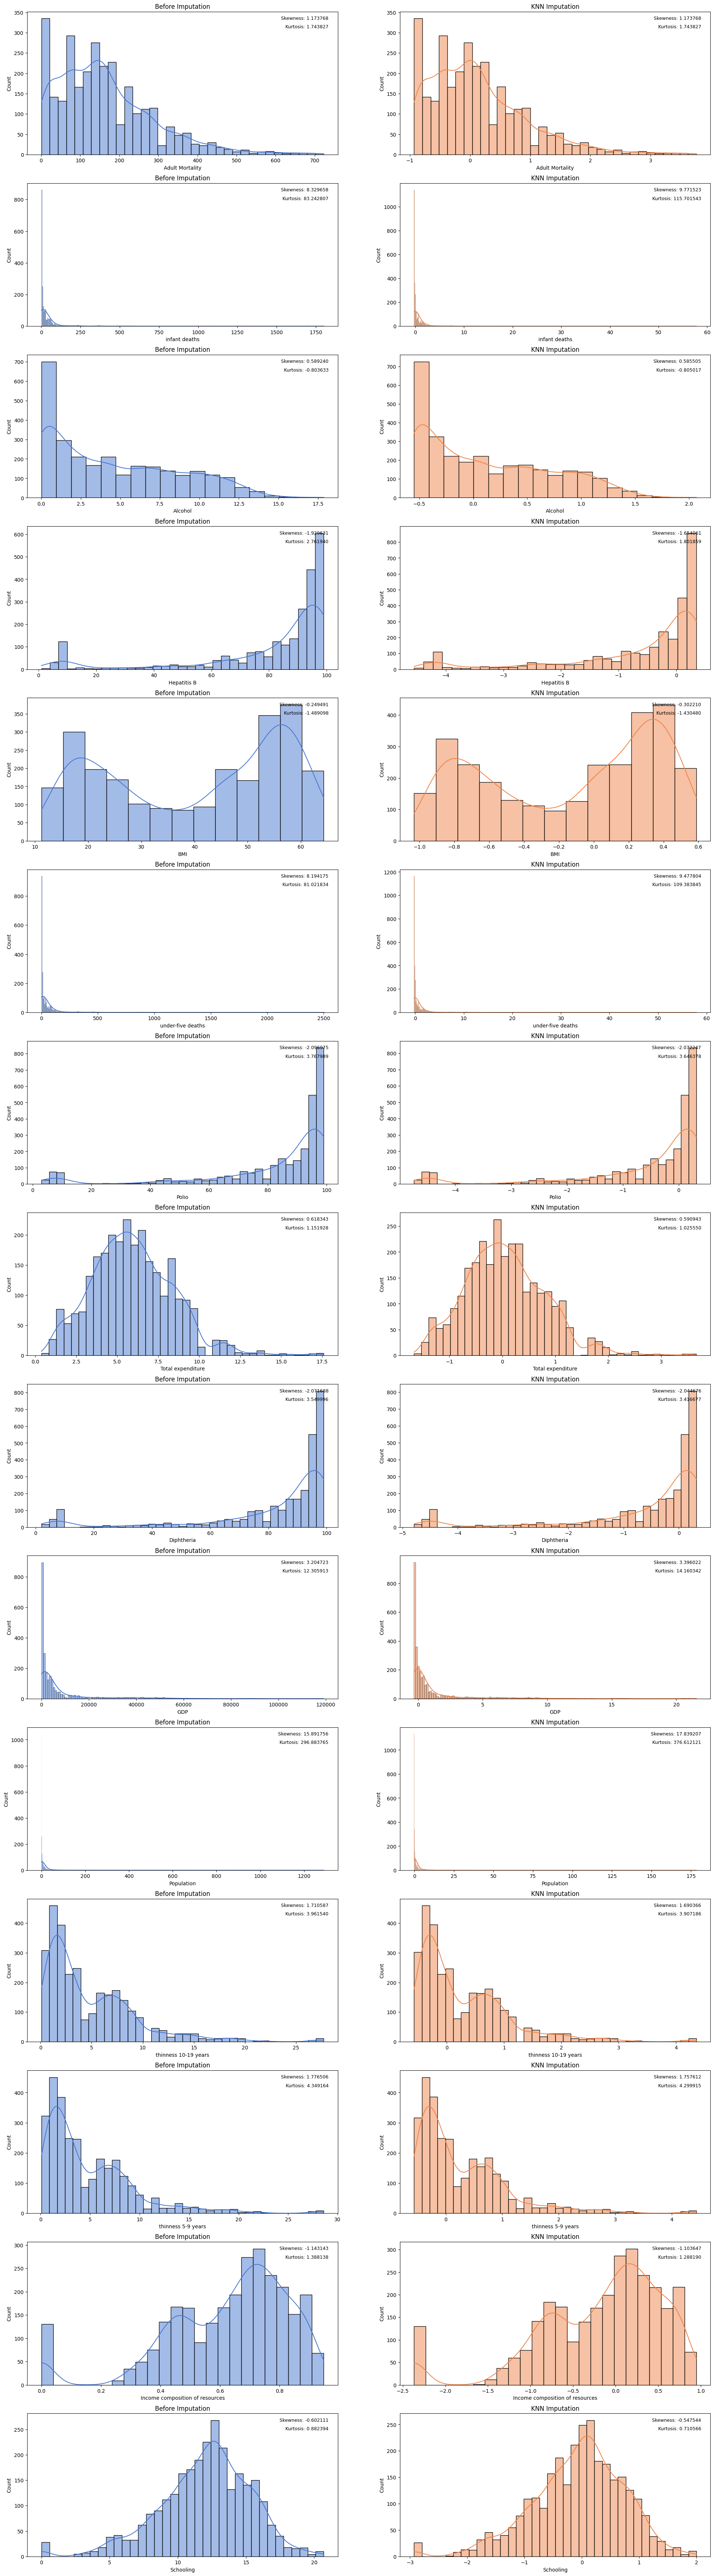

In [ ]:
draw_histplot()

We can see that the difference between the values of skewness and kurtosis before and after imputation does not vary much. This means that the KNN imputation technique has performed decently here as it does not affect the data distribution too much. 

### 2. Dealing with outliers

Similar to missing values, there are a few things that need to be done in order to deal with outliers:

- Detect the outliers - First, we will use Boxplots or Tukey's Method to detect if there are any outliers in the data.

- Deal with outliers - After detecting the outliers, we will use different methods or transformations to get rid of the outliers. If the data permits, we can also drop them.

In [ ]:
from scipy.stats import zscore

# Select numeric columns
numeric_columns = data1.select_dtypes(include=[np.number]).columns

# Apply z-score normalization to numeric columns
df_zscore = data1.copy()
df_zscore[numeric_columns] = data1[numeric_columns].apply(zscore)
df_zscore.head() 
df_zscore = df_zscore.drop(['Status','Year'],axis=1)

In [ ]:
outlier_columns = df_zscore.columns[(df_zscore > 3).any() | (df_zscore < -3).any()].tolist()
outlier_counts = {}
outlier_values = {}

for column in outlier_columns:
    outliers = df_zscore[column][(df_zscore[column] > 3) | (df_zscore[column] < -3)]
    outlier_counts[column] = len(outliers)
    outlier_values[column] = outliers.tolist()

# Print outlier counts and values
for column in outlier_columns:
    print(f"Column: {column}")
    print(f"Outlier Count: {outlier_counts[column]}")
    print(f"Outlier Values: {outlier_values[column]}")
    print()

Column: Adult Mortality
Outlier Count: 40
Outlier Values: [3.2284606084276906, 3.9204973837782924, 4.250421892957068, 4.298703528446644, 4.137764743481388, 3.8802626875369786, 3.445727968130787, 4.161905561226177, 3.2284606084276906, 3.437681028882524, 3.7676055380612987, 3.936591262274818, 4.1055769864883365, 4.033154533253971, 3.888309626785241, 3.679089206330408, 3.389399393392947, 3.043381005717646, 3.172132033689851, 3.3974463326412097, 3.6227606315925684, 3.6066667530960426, 3.4940096036203636, 3.405493271889472, 3.212366729931165, 3.3974463326412097, 3.2445544869242164, 3.011193248724595, 3.131897337448537, 3.131897337448537, 3.3250238794068445, 3.590572874599517, 3.6147136923443055, 3.3974463326412097, 3.7595585988130362, 4.443548434915375, 4.491830070404951, 4.42745455641885, 4.194093318219228, 4.025107594005709]

Column: infant deaths
Outlier Count: 36
Outlier Values: [3.036032181481073, 3.2992159892393227, 3.5963589979986366, 3.8765224062574184, 7.4422385113691885, 7.8412591

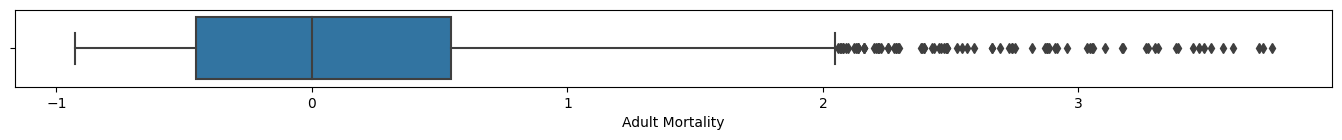

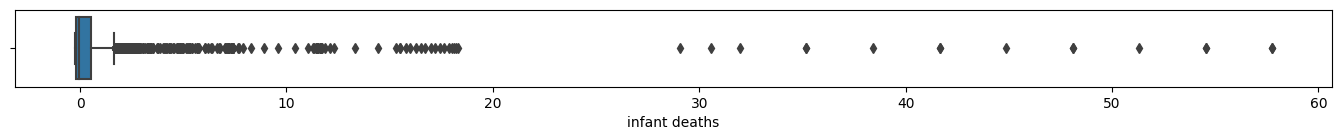

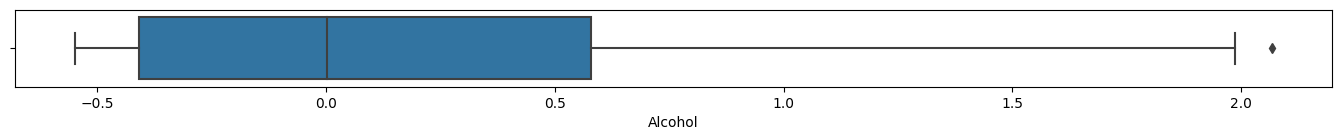

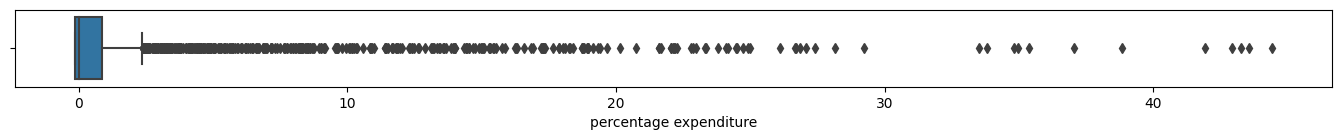

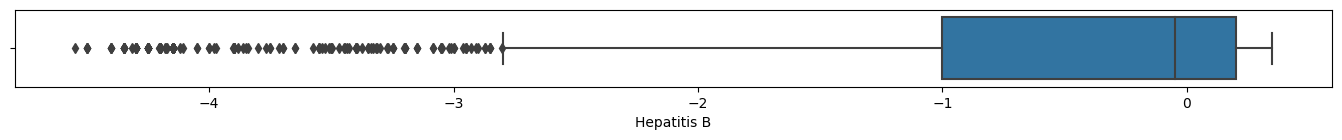

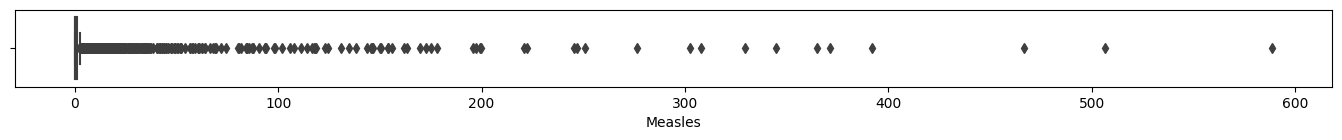

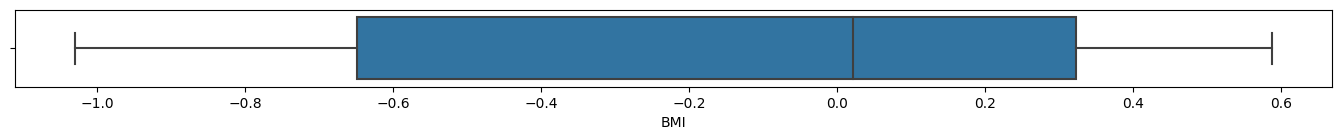

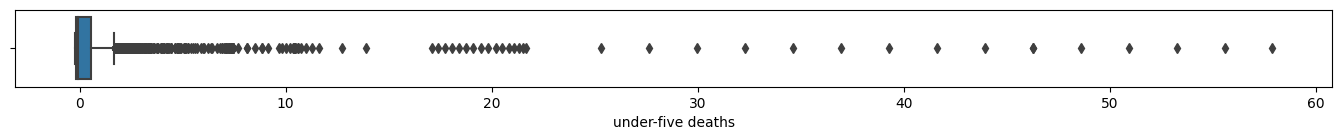

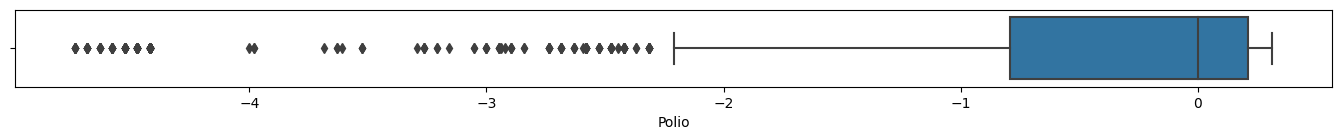

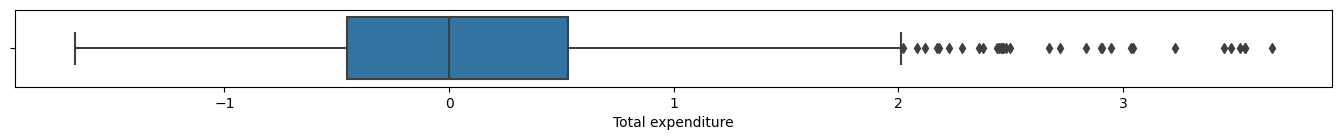

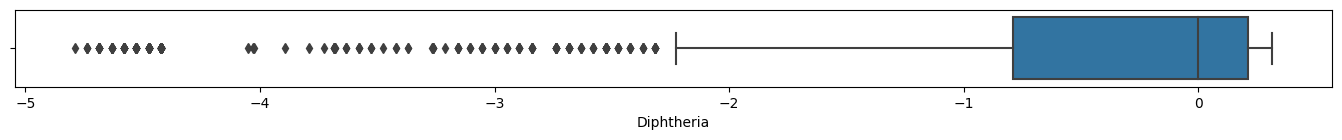

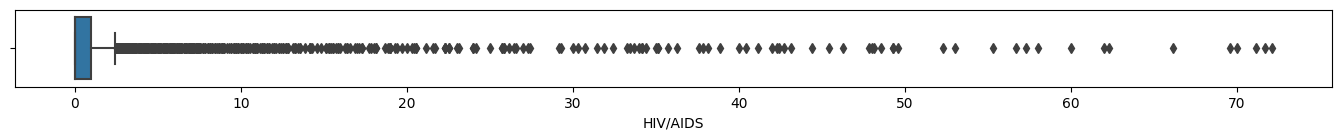

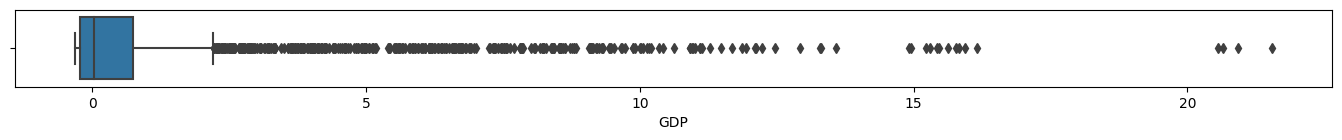

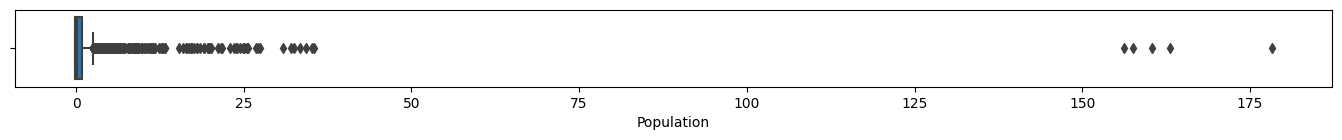

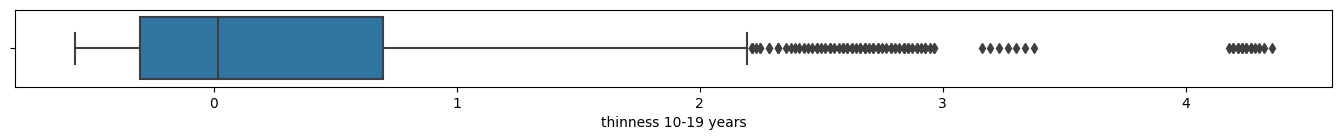

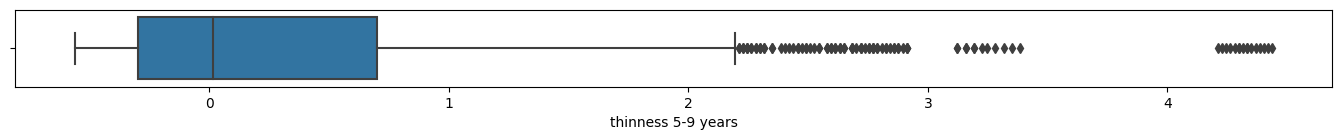

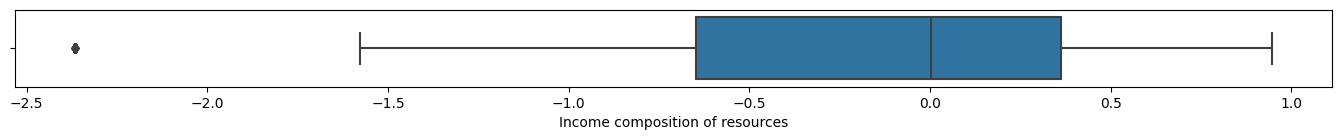

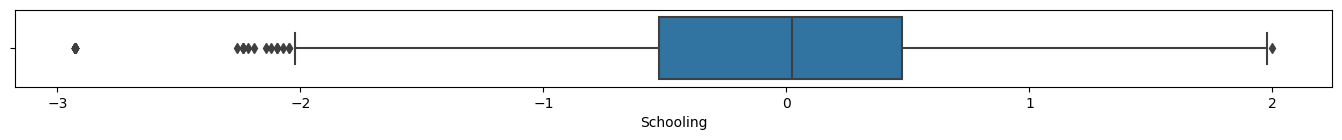

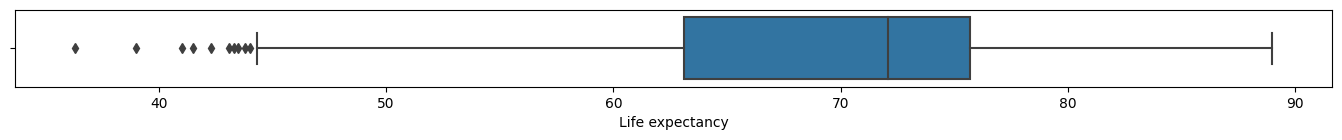

In [ ]:
# Plotting boxplots to check for the outliers

cols_to_drop = ['Status', 'Year']
dropped_col = data1[cols_to_drop]

data = data1.drop(columns=cols_to_drop)

for column in data:
    plt.figure(figsize=(17, 1))
    plt.tight_layout()
    sns.boxplot(data=data, x=column)

Since each variable has a unique amount of outliers and also has outliers on different sides of the data, the best route to take is probably winsorizing (limiting) the values for each variable on its own until no outliers remain. 

### Winsorization

Winsorization is a data transformation technique used to limit extreme values or outliers in a dataset by replacing them with less extreme values. It involves changing the values beyond a certain threshold to the nearest value within that threshold. Winsorization helps to reduce the impact of extreme values on statistical analysis or modeling by replacing them with more representative values within a given range. It allows us to preserve the overall distribution and characteristics of the data while reducing the influence of outliers.

In [ ]:
""" from scipy.stats.mstats import winsorize 

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(data[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(data[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
"""


" from scipy.stats.mstats import winsorize \n\ndef test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):\n    wins_data = winsorize(data[col], limits=(lower_limit, upper_limit))\n    wins_dict[col] = wins_data\n    if show_plot == True:\n        plt.figure(figsize=(15,5))\n        plt.subplot(121)\n        plt.boxplot(data[col])\n        plt.title('original {}'.format(col))\n        plt.subplot(122)\n        plt.boxplot(wins_data)\n        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))\n        plt.show()\n"

In [ ]:
"""
cont_vars = list(data.columns)
wins_dict = {}

test_wins(cont_vars[0], lower_limit=.05,upper_limit=0, show_plot=True)
test_wins(cont_vars[1], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[2],lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[3], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[4], lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[5], lower_limit=.15,upper_limit=0, show_plot=True)
test_wins(cont_vars[6], lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[7],lower_limit=0,upper_limit=0, show_plot=True)
test_wins(cont_vars[8], lower_limit=0,upper_limit=0.15, show_plot=True)
test_wins(cont_vars[9], lower_limit=.1,upper_limit=0, show_plot=True)
test_wins(cont_vars[10], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[11], lower_limit=.15,upper_limit=0, show_plot=True)
test_wins(cont_vars[12],lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[13],lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[14], lower_limit=0,upper_limit=0.2, show_plot=True)
test_wins(cont_vars[15], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[16], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[17], lower_limit=0,upper_limit=0.05, show_plot=True)
test_wins(cont_vars[18], lower_limit=0.05,upper_limit=0.05,show_plot=True)
"""

'\ncont_vars = list(data.columns)\nwins_dict = {}\n\ntest_wins(cont_vars[0], lower_limit=.05,upper_limit=0, show_plot=True)\ntest_wins(cont_vars[1], lower_limit=0,upper_limit=0.05, show_plot=True)\ntest_wins(cont_vars[2],lower_limit=0,upper_limit=0.2, show_plot=True)\ntest_wins(cont_vars[3], lower_limit=0,upper_limit=0.05, show_plot=True)\ntest_wins(cont_vars[4], lower_limit=0,upper_limit=0.2, show_plot=True)\ntest_wins(cont_vars[5], lower_limit=.15,upper_limit=0, show_plot=True)\ntest_wins(cont_vars[6], lower_limit=0,upper_limit=0.2, show_plot=True)\ntest_wins(cont_vars[7],lower_limit=0,upper_limit=0, show_plot=True)\ntest_wins(cont_vars[8], lower_limit=0,upper_limit=0.15, show_plot=True)\ntest_wins(cont_vars[9], lower_limit=.1,upper_limit=0, show_plot=True)\ntest_wins(cont_vars[10], lower_limit=0,upper_limit=0.05, show_plot=True)\ntest_wins(cont_vars[11], lower_limit=.15,upper_limit=0, show_plot=True)\ntest_wins(cont_vars[12],lower_limit=0,upper_limit=0.2, show_plot=True)\ntest_wins(

We have shown two boxplots above for each feature. The first boxplot shows the original distribution with outliers. The second boxplot shows the distribution of the feature after winsorization. Thus, all the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers.

Before moving ahead, we have to save the winsorized data in a new dataframe.

In [ ]:
"""
wins_df = data.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]
    """

'\nwins_df = data.iloc[:, 0:3]\nfor col in cont_vars:\n    wins_df[col] = wins_dict[col]\n    '

In [ ]:
## wins_df.head()

In [ ]:
# Concatenate wins_df and cols_to_drop_df
# df = pd.concat([dropped_col, wins_df], axis=1)

In [ ]:
# df.head()

### Exploratory Data Analysis

- LE of developed and developing countries over the years. Avg life exp of developed and developing countries.

- pie chart of developing and developed countries.

- Top 10 countries with most/least life exp. Can be done only if we retain the country column.

- Heatmap

- Bubble plot to understand relation between life exp and population for different continents.

- Lineplot between GDP and life exp

- Scatterplot of schooling and life exp with status as hue.

### Univariate Analysis 

Univariate analysis is looking at the data for each variable on its own. This is generally done best by using histograms. 

### Distribution of Life Expectancy

<Figure size 1500x1200 with 0 Axes>

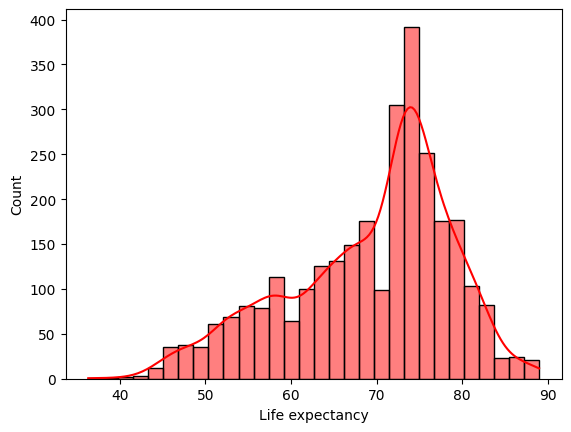

<Figure size 1500x1200 with 0 Axes>

In [ ]:
sns.histplot(data1['Life expectancy'], kde=True, color = 'Red')
plt.figure(figsize = (15,12))

As is clear from the histogram plotted above, most of the life spans lie between 45 to 90 years, with an average life span of 70 years.

### Distribution of other variables

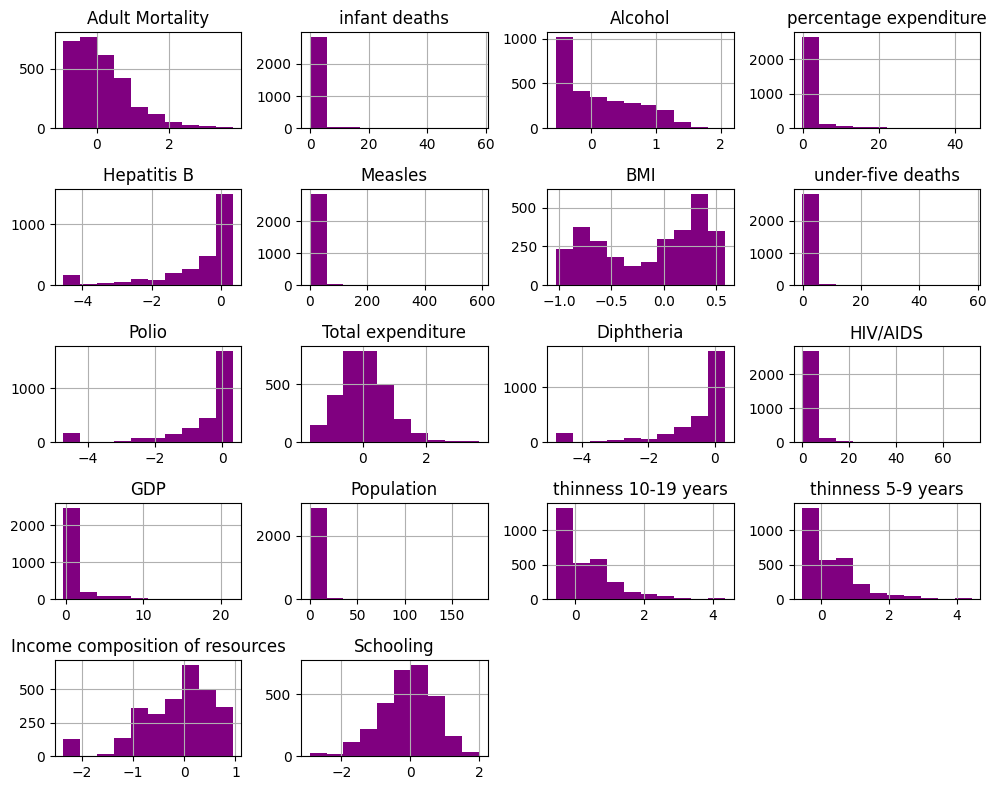

In [ ]:
data1[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']].hist(bins=10, figsize=(10,8), color='purple')
       
plt.tight_layout()
plt.show()

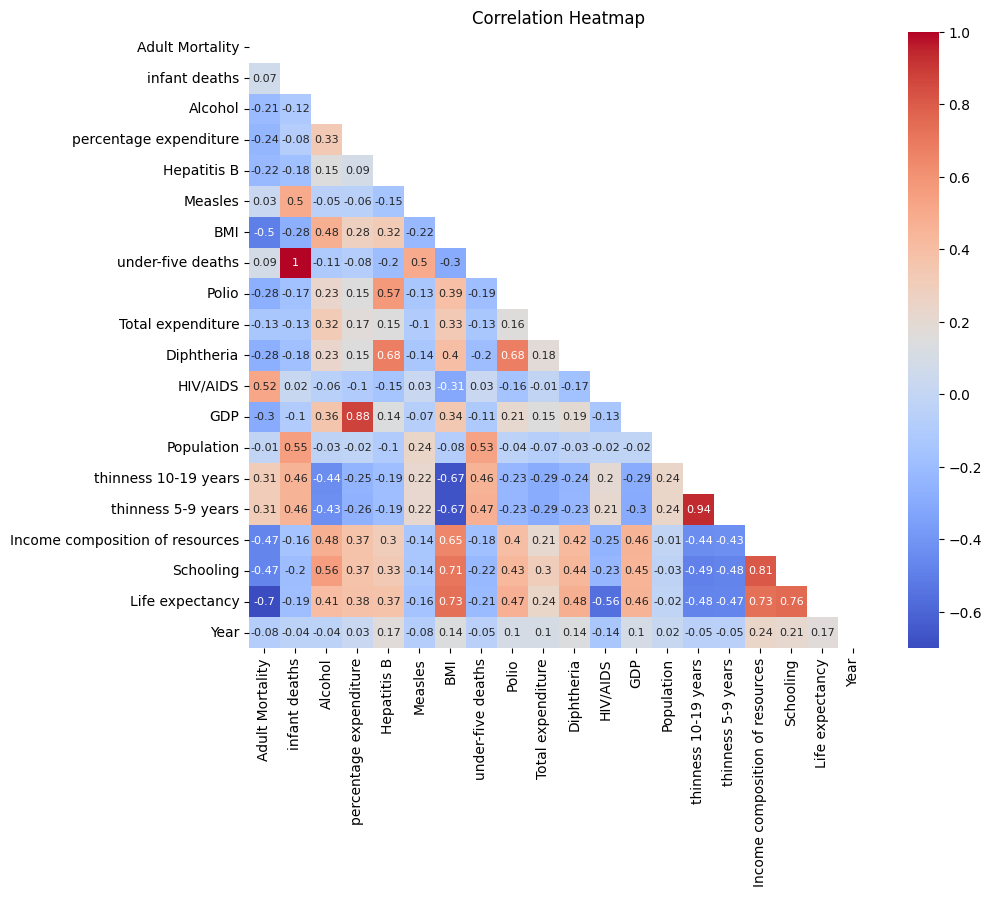

In [ ]:
correlation_matrix = data1.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', mask=mask, annot_kws={"size": 8}, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()


- The above heatmap validates the fact that life expectancy and adult mortality must be negatively correlated.

- BMI has a positive correlation with Life expectancy (which should not be anticipated with certainity as a very high BMI definitely does not increase Life expectancy.

- Under-five deaths and infant deaths have a correlation of 1 which is anticipated since both the variables are essentially the same. So we can include only one of the variables while building the model to avoid redundancy of data. (Or form a linear combination of these two variables to create a new variable altogether???)

- Schooling has a positive correlation with life expectancy which validates the fact that proper schooling leads to adoption of healthy habits.

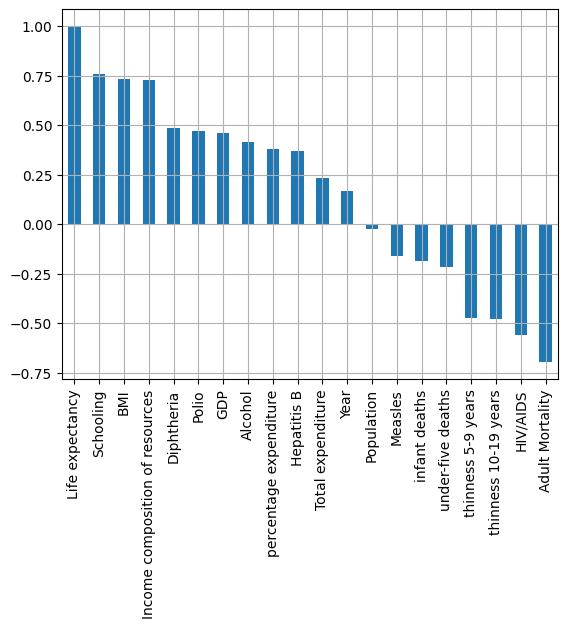

In [ ]:
data1.corr()['Life expectancy'].sort_values(ascending=False).plot(kind='bar')
plt.grid(True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


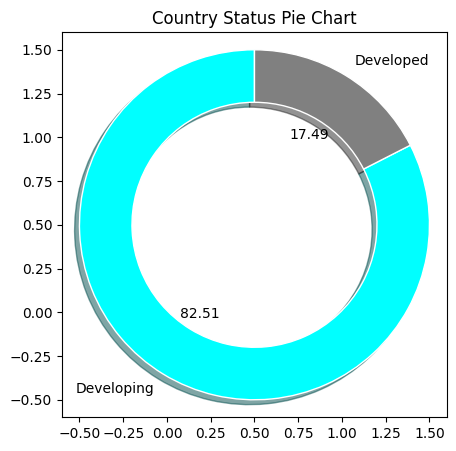

In [ ]:
plt.figure(figsize=(10, 5))
data1['Status'].value_counts().plot(kind='pie', autopct='%.2f', wedgeprops=dict(width=0.3, edgecolor='w'), 
                                shadow=True, startangle=90, colors=['cyan', 'grey'],cmap='tab20c', 
                                radius=1, center=(0.5, 0.5), frame=True)

plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

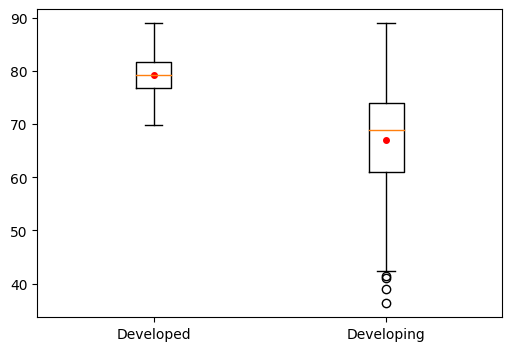

In [ ]:
g = data1.groupby('Status')['Life expectancy'].mean()
plt.figure(figsize=(6, 4))
plt.boxplot([data1[data1['Status'] == c]['Life expectancy'] for c in g.index], labels=g.index)
plt.plot(range(1, len(g.index) + 1), g, 'ro', markersize=4)
plt.show()

The red dots on the box plots show the average life expectancy for each category. The average value for Developed countries (around 80) is greater than that for Developing countries (around 70) which is also anticipated.

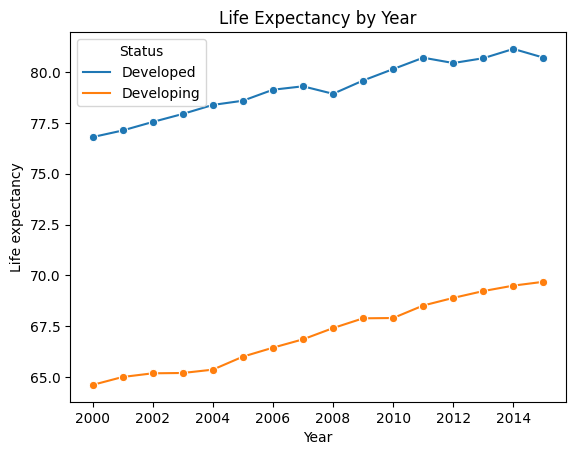

In [ ]:
mean_life = data1.groupby(['Status', 'Year'])['Life expectancy'].mean().reset_index()

sns.lineplot(data=mean_life, x='Year', y='Life expectancy', hue='Status', marker='o')

plt.title('Life Expectancy by Year')
plt.legend(title='Status')
plt.show()

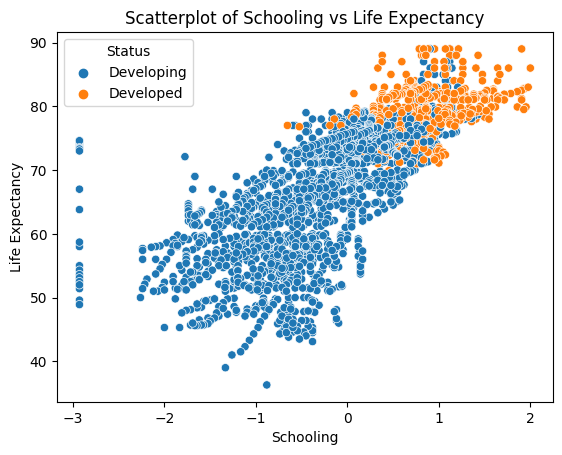

In [ ]:
sns.scatterplot(data=data1, x='Schooling', y='Life expectancy', hue='Status')

# Set the title and axis labels
plt.title('Scatterplot of Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

It is evident from the above plot that developed countries offer proper education, thus leading to awareness to adopt healthy lifestyle habits resulting in a higher life expectancy.

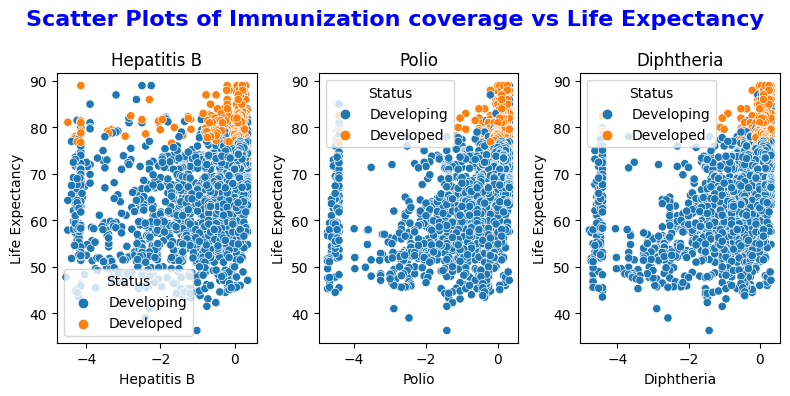

In [ ]:
variables = ['Hepatitis B', 'Polio', 'Diphtheria']
plots_per_row = 3
num_rows = (len(variables) + plots_per_row - 1) // plots_per_row
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(8, 4))
for ax, var in zip(axes.flat, variables):
    sns.scatterplot(data=data1, x=var, y='Life expectancy', hue='Status', ax=ax)
    ax.set_title('{}'.format(var))
    ax.set_xlabel(var)
    ax.set_ylabel('Life Expectancy')

plt.suptitle('Scatter Plots of Immunization coverage vs Life Expectancy', fontsize=16, color='Blue', fontweight='bold')
plt.tight_layout()
plt.show()

As expected, immunization coverage (hepatitis, Diptheria, Polio) has a direct impact on the life expectancy. Countries with high immunization coverage have better life expectancy. Developed countries offer better health facilities evident from the high percentage of immunization coverage among 1 year olds, thereby causing an increase in life expectancy.

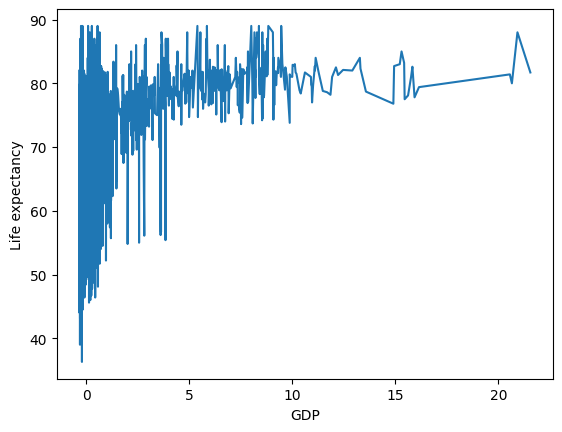

In [ ]:
sns.lineplot(data=data1, x='GDP', y='Life expectancy')
plt.show()

In [ ]:
data1['Status']

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2928, dtype: object

In [ ]:
'''
x = 'GDP'
y = 'Life expectancy'
bubble_size = 'Population'
status = 'Status'

# Create a dictionary to map the status categories to colors
status_colors = {'Developing': 'blue', 'Developed': 'red'}

# Create the bubble plot
plt.scatter(data1[x], data1[y], s=data1[bubble_size], c=status_colors, alpha=0.6)

# Set labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Plot: GDP vs Life Expectancy')

# Create a legend for the status categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=status)
                   for status, color in status_colors.items()]
plt.legend(handles=legend_elements, title='Status')

# Show the plot
plt.show()
'''

"\nx = 'GDP'\ny = 'Life expectancy'\nbubble_size = 'Population'\nstatus = 'Status'\n\n# Create a dictionary to map the status categories to colors\nstatus_colors = {'Developing': 'blue', 'Developed': 'red'}\n\n# Create the bubble plot\nplt.scatter(data1[x], data1[y], s=data1[bubble_size], c=status_colors, alpha=0.6)\n\n# Set labels and title\nplt.xlabel(x)\nplt.ylabel(y)\nplt.title('Bubble Plot: GDP vs Life Expectancy')\n\n# Create a legend for the status categories\nlegend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=status)\n                   for status, color in status_colors.items()]\nplt.legend(handles=legend_elements, title='Status')\n\n# Show the plot\nplt.show()\n"

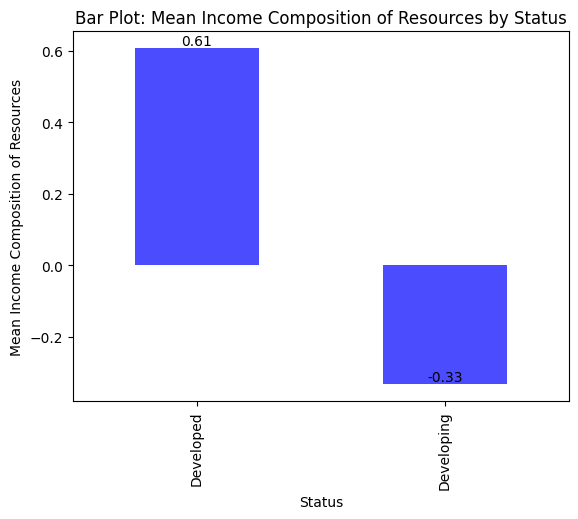

In [ ]:
mean_income_comp = data1.groupby('Status')['Income composition of resources'].mean()

ax = mean_income_comp.plot(kind='bar', color='blue', alpha=0.7)

# Set the labels and title
plt.xlabel('Status')
plt.ylabel('Mean Income Composition of Resources')
plt.title('Bar Plot: Mean Income Composition of Resources by Status')

# Add mean values as text above each bar
for i, v in enumerate(mean_income_comp):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

# Show the plot
plt.show()

In [ ]:
data1.shape

(2928, 21)

In [ ]:
data1["Status"] = data1["Status"].map({'Developing': 0, 'Developed': 1})

In [ ]:
data1.isnull().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Status                             0
Year                               0
dtype: int64

In [ ]:
!pip install statsmodels==0.14.0


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Checking the Variance Inflation Factor

We will check the VIF score for all the variables to make sure there is no multicollinearity among the independent variables.

In [ ]:
X = data1.drop(['Life expectancy'], axis = 1)
y= data1['Life expectancy']

In [ ]:
X.isnull().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status                             0
Year                               0
dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF( df ):
    vif = pd.DataFrame()
    vif['Features'] = df.columns.values
    vif["VIF Value"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif
    
VIF_df = VIF(X)
VIF_df

,Features,VIF Value
0,Adult Mortality,1.877540
1,infant deaths,179.104530
2,Alcohol,2.088393
3,percentage expenditure,5.259837
4,Hepatitis B,2.508025
5,Measles,1.444999
6,BMI,3.547550
7,under-five deaths,179.476877
8,Polio,2.435431
9,Total expenditure,1.238971


We can see that the columns 'Infant Deaths' and 'Thinness 5-9 years' have a very high value of VIF so its better to drop these variables from the model.

In [ ]:
X = X.drop(['infant deaths','thinness 5-9 years'], axis = 1)

In [ ]:
VIF_df = VIF(X)
VIF_df

,Features,VIF Value
0,Adult Mortality,1.874270
1,Alcohol,2.053413
2,percentage expenditure,5.257683
3,Hepatitis B,2.507676
4,Measles,1.439475
5,BMI,3.464783
6,under-five deaths,2.223566
7,Polio,2.428817
8,Total expenditure,1.236432
9,Diphtheria,3.077556


### Splitting the dataset 

In [ ]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f'X_train shape:{x_train.shape}')
print(f'X_valid shape:{x_valid.shape}')
print(f'X_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_valid shape:{y_valid.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape:(2342, 18)
X_valid shape:(293, 18)
X_test shape:(293, 18)
y_train shape:(2342,)
y_valid shape:(293,)
y_test shape:(293,)


In [ ]:
x_train.columns

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'Income composition of resources', 'Schooling', 'Status', 'Year'],
      dtype='object')

In [ ]:
x_train = x_train.drop(['Status','Year'], axis=1)
x_test = x_test.drop(['Status','Year'], axis=1)


### Transformation

In data preprocessing, the transformation techniques are used to modify the distribution of variables to make them more suitable for statistical analysis or modeling. These techniques are particularly useful when dealing with skewed or non-normal distributions.

Power transform is a data transformation technique used to stabilize variance and improve the normality of a variable. It is commonly applied to address issues like skewness and heteroscedasticity in the data. The power transform applies a mathematical transformation to the data using a power parameter.

Since some independent variables take negative values as well due to scaling, we will use the Yeo-Johnson transform.

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x_train_trans=pt.fit_transform(x_train)
x_test_trans=pt.transform(x_test)
pd.DataFrame({'cols':x_train.columns,'yeo-johnson-lambdas':pt.lambdas_})

,cols,yeo-johnson-lambdas
0,Adult Mortality,0.195718
1,Alcohol,0.048903
2,percentage expenditure,-1.327649
3,Hepatitis B,2.789834
4,Measles,-1.216501
5,BMI,1.731289
6,under-five deaths,-1.518059
7,Polio,2.989685
8,Total expenditure,0.660574
9,Diphtheria,3.001107


In [ ]:
x_train_trans = pd.DataFrame(x_train_trans,columns=x_train.columns)
x_test_trans = pd.DataFrame(x_test_trans,columns=x_test.columns)

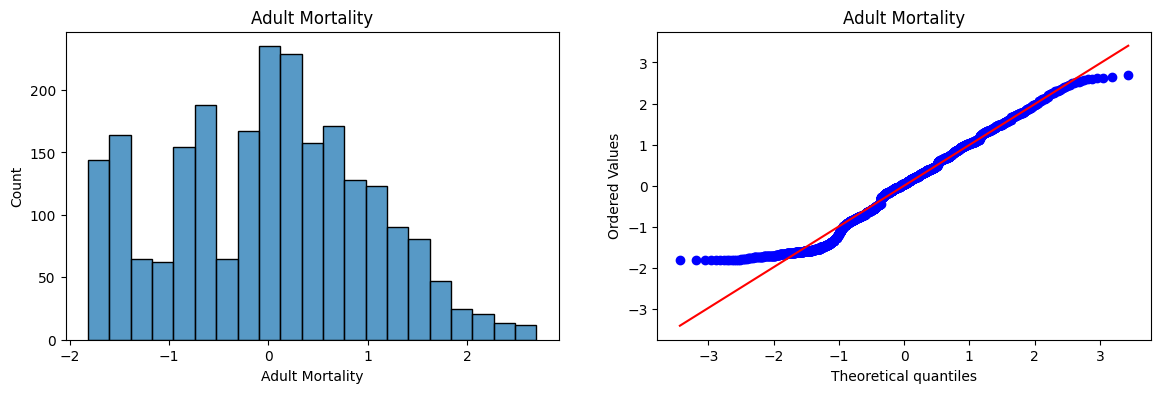

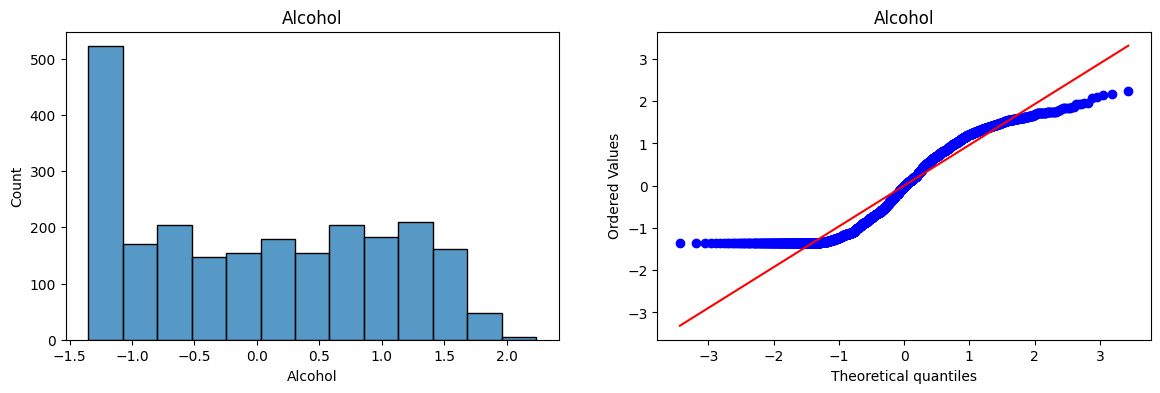

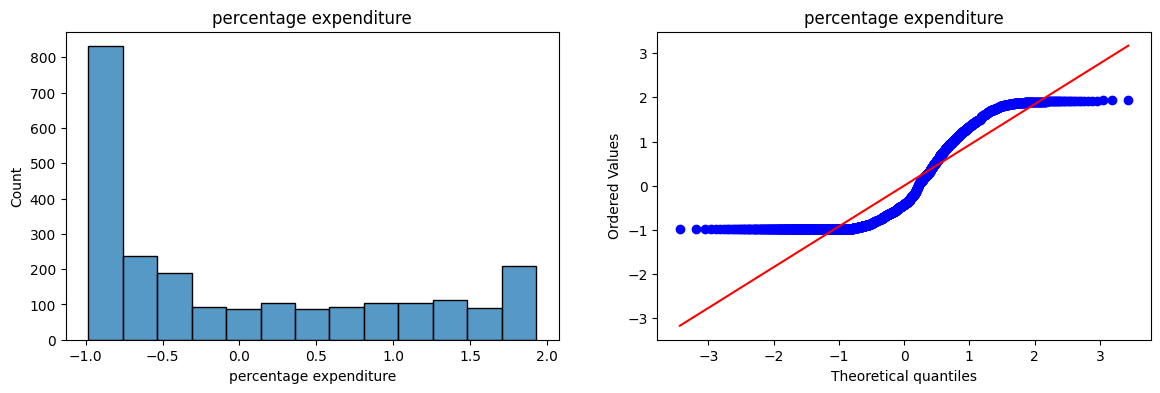

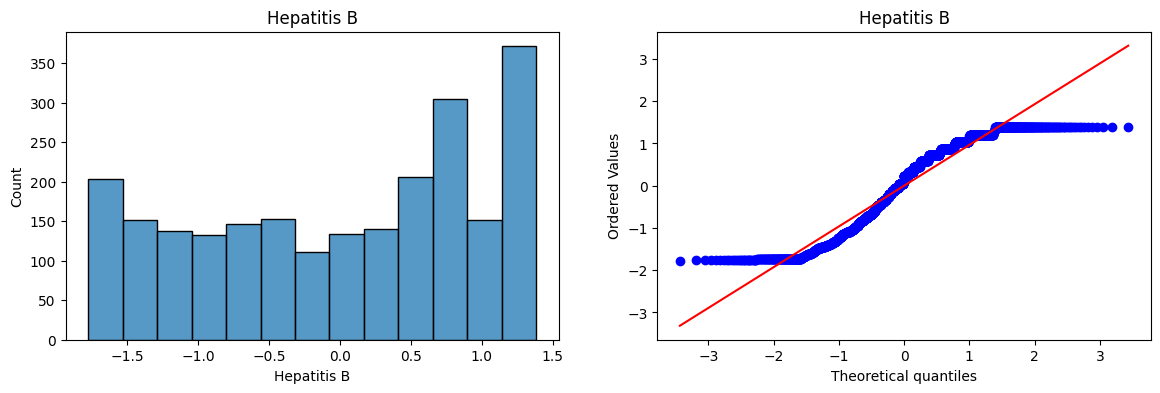

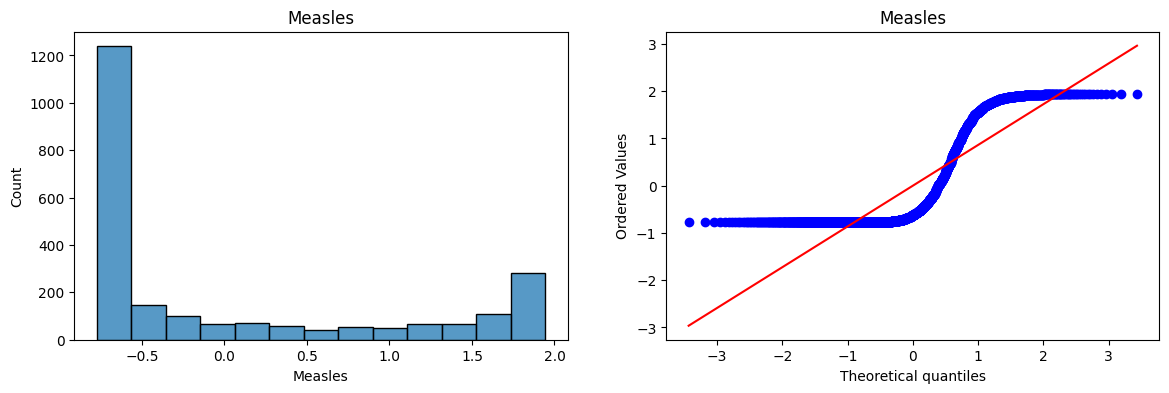

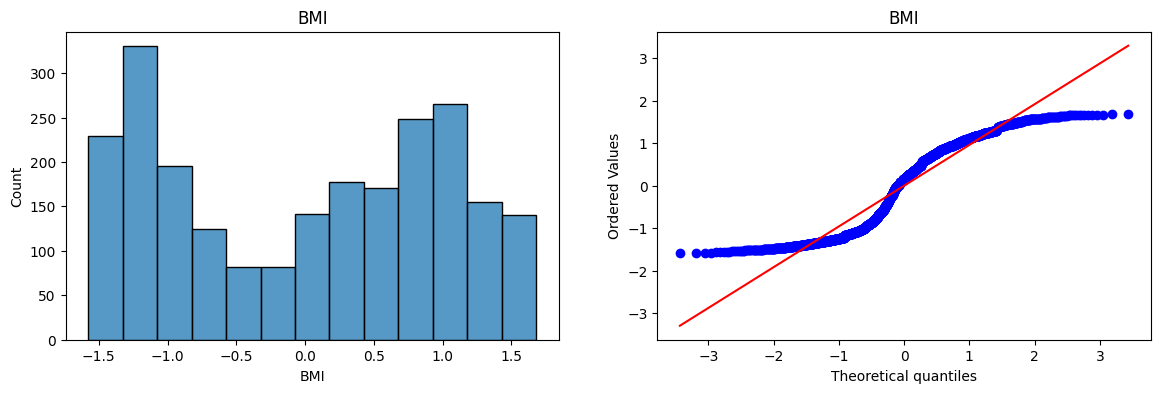

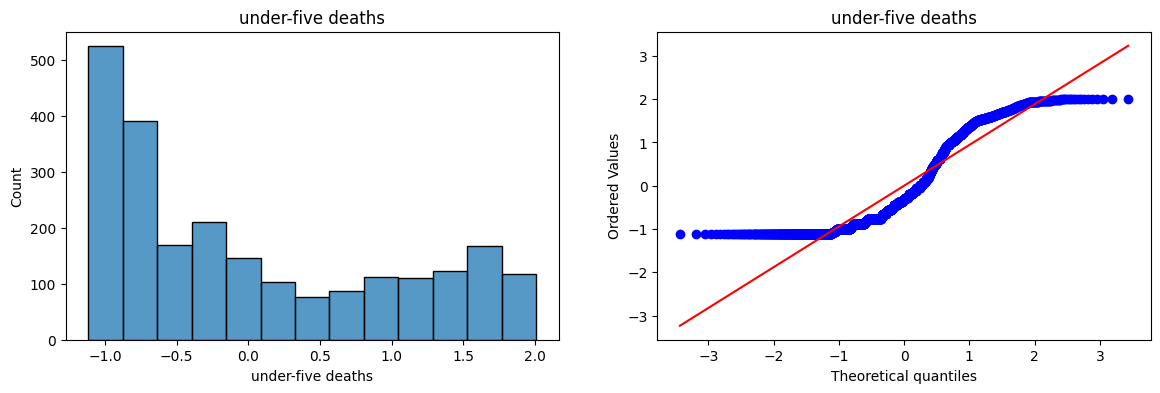

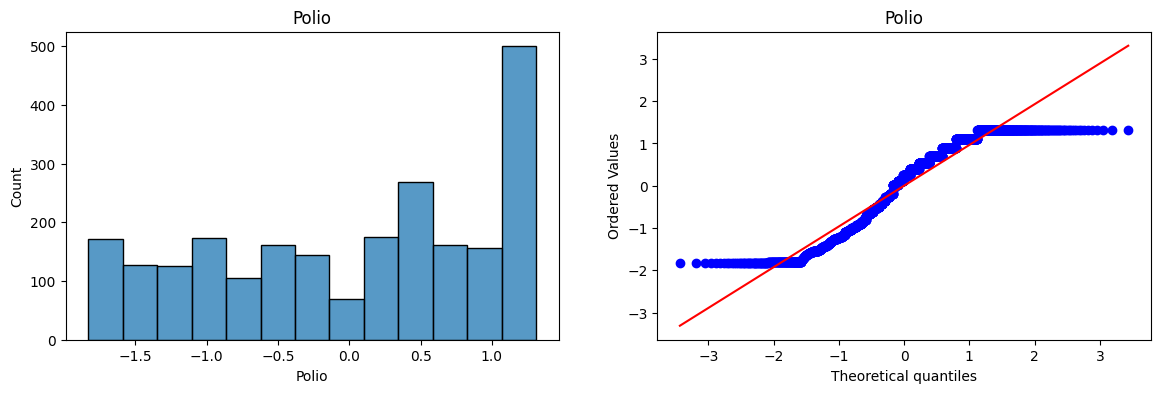

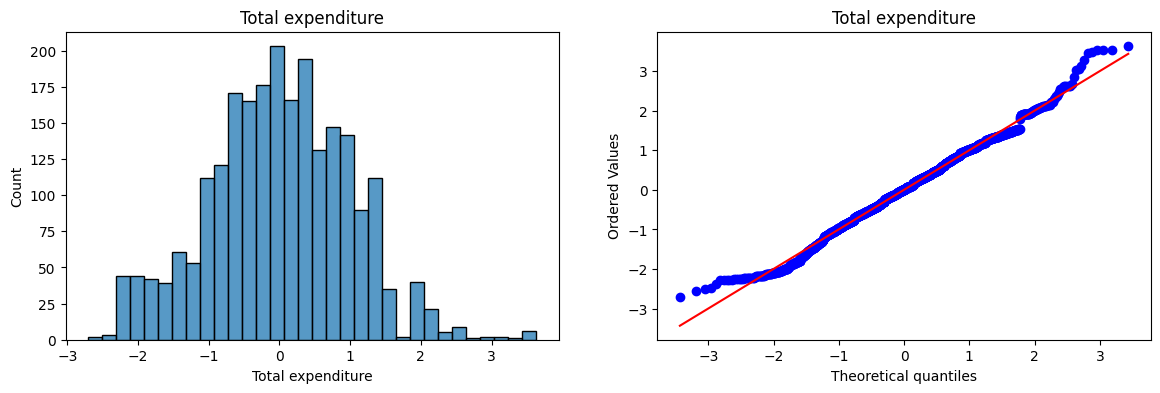

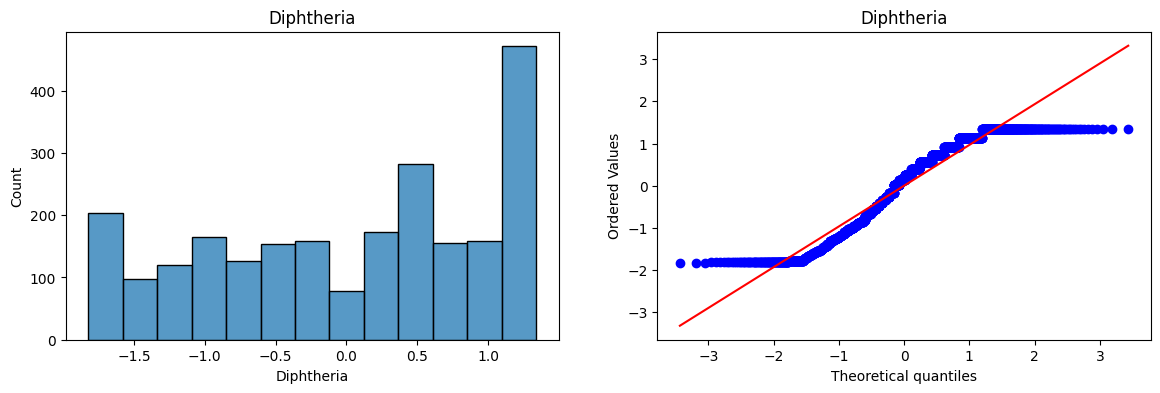

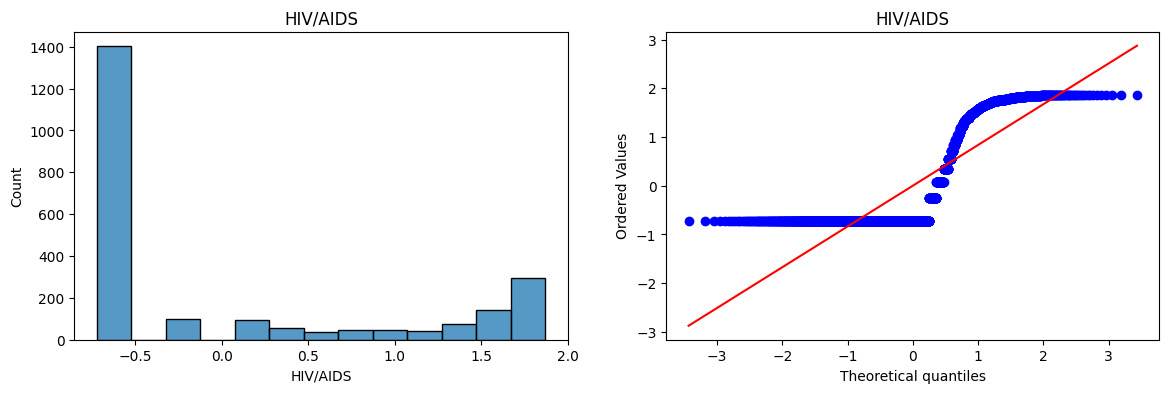

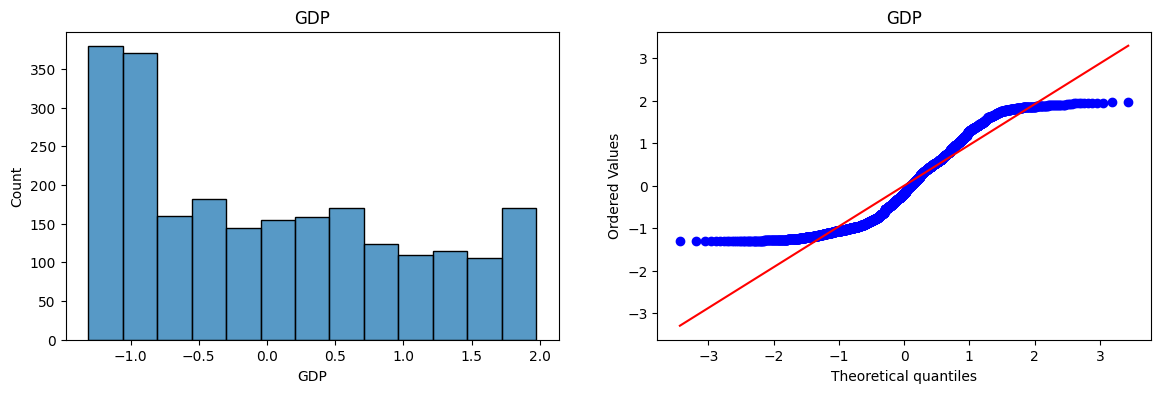

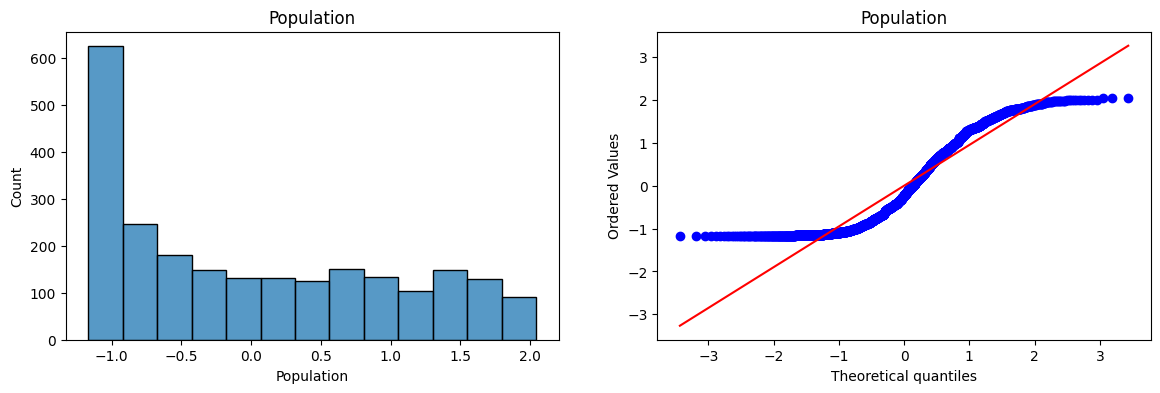

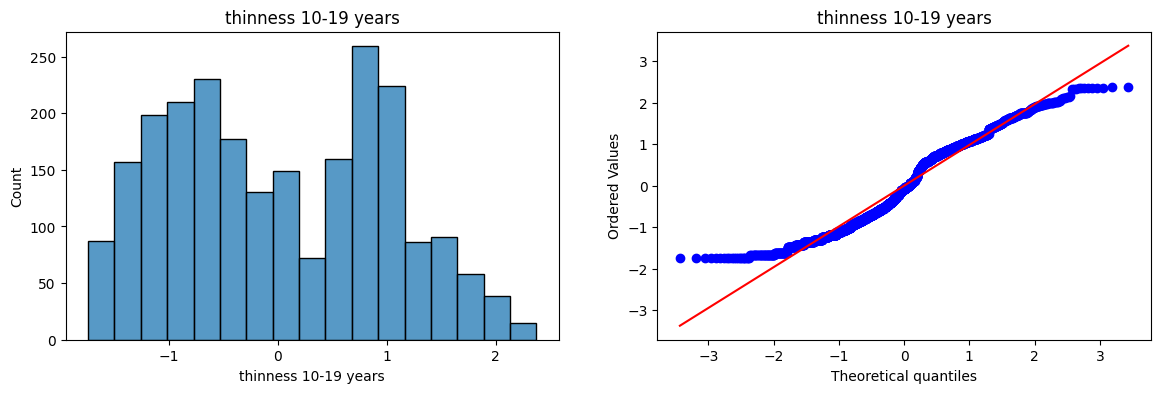

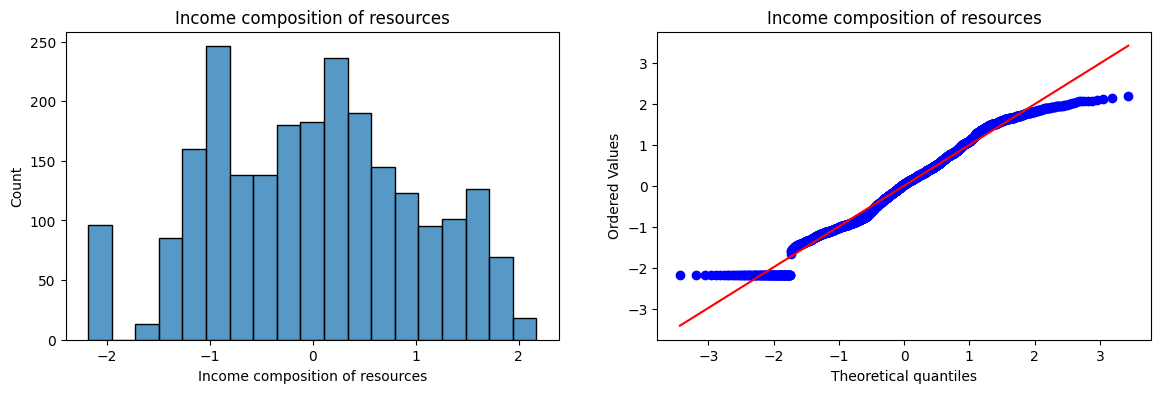

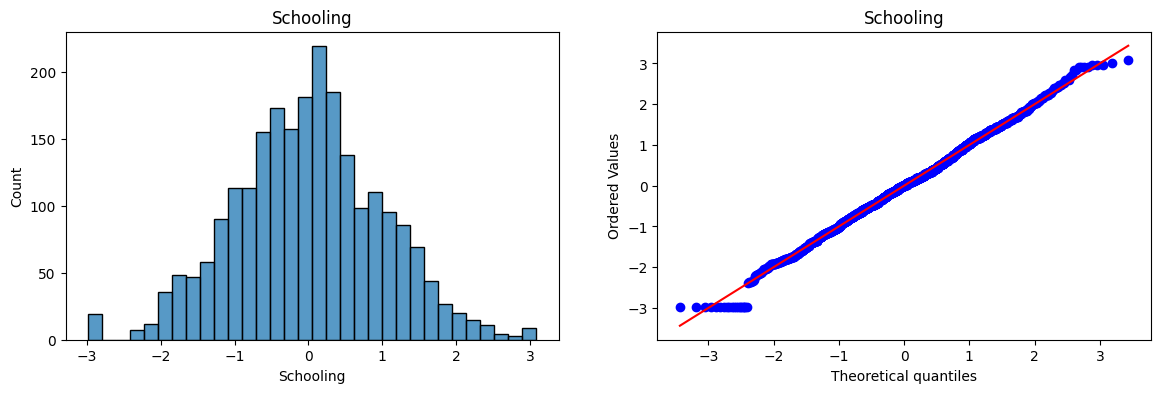

In [ ]:
for col in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train_trans[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train_trans[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

### Model building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(x_train_trans,y_train)

y_pred = lr.predict(x_test_trans)

test_score = lr.score(x_test_trans, y_test)
train_score = lr.score(x_train_trans, y_train)

print("Test Score:", test_score)
print("Train Score:", train_score)

Test Score: 0.8285898392478092
Train Score: 0.841416474555733


In [ ]:
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))


MAE :  2.87441279829842
MSE :  14.35259670786924
RMSE :  3.788482111330241


In [ ]:
print("R2 score : ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
# Adjusted R2 
adj_r2 = 1 - ((1-r2)*(x_test.shape[0])/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 score : ",adj_r2)

R2 score :  0.8285898392478092
Adjusted R2 score :  0.8180319670275655


In [ ]:
m = lr.coef_
intercepts = lr.intercept_
print(m , intercepts)

[-1.2753918  -0.08414054  0.54137376 -0.46910085 -0.40285591  0.40641771
 -0.53282689  0.20940889  0.04789813  0.94453413 -3.88711258  0.07976422
 -0.08294485 -0.40151644  2.59926328  0.47779985] 69.14901793339027


## Checking Assumptions of Linear Models 

### 1. Linear Relationship

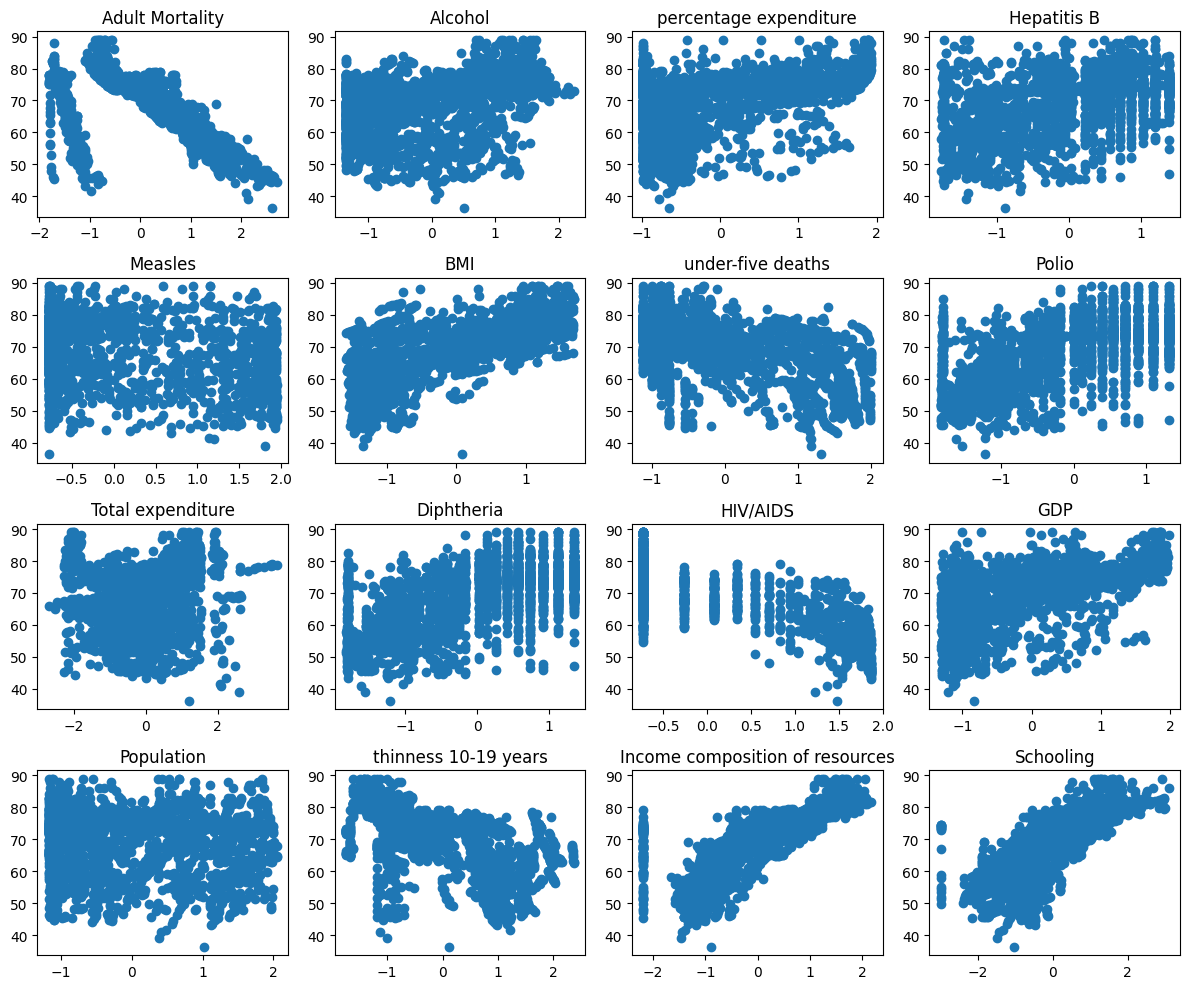

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 10))

features = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
            'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
            'Income composition of resources', 'Schooling']

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        ax.scatter(x_train_trans[features[i]], y_train)
        ax.set_title(features[i])

plt.tight_layout()
plt.show()



### 2. Multicollinearity

In [ ]:
VIF(x_train_trans)

,Features,VIF Value
0,Adult Mortality,1.510407
1,Alcohol,1.801603
2,percentage expenditure,2.178977
3,Hepatitis B,3.154661
4,Measles,1.571178
5,BMI,3.646559
6,under-five deaths,2.116874
7,Polio,6.111682
8,Total expenditure,1.234608
9,Diphtheria,6.935456


In [ ]:
x_train_trans1 = x_train_trans.drop(['Polio','Diphtheria'], axis=1)
x_test_trans1 = x_test_trans.drop(['Polio','Diphtheria'], axis=1)

In [ ]:
lr.fit(x_train_trans1,y_train)

y_pred1 = lr.predict(x_test_trans1)

test_score = lr.score(x_test_trans1, y_test)
train_score = lr.score(x_train_trans1, y_train)

print("Test Score:", test_score)
print("Train Score:", train_score)

Test Score: 0.8264646907046629
Train Score: 0.8375515410070291


### 3. Normality of Residuals

In [ ]:
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : y_pred,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2532,81.0,80.572023,0.427977
402,59.0,61.561566,-2.561566
2548,73.2,69.737362,3.462638
677,79.7,80.479873,-0.779873
298,65.0,61.609476,3.390524


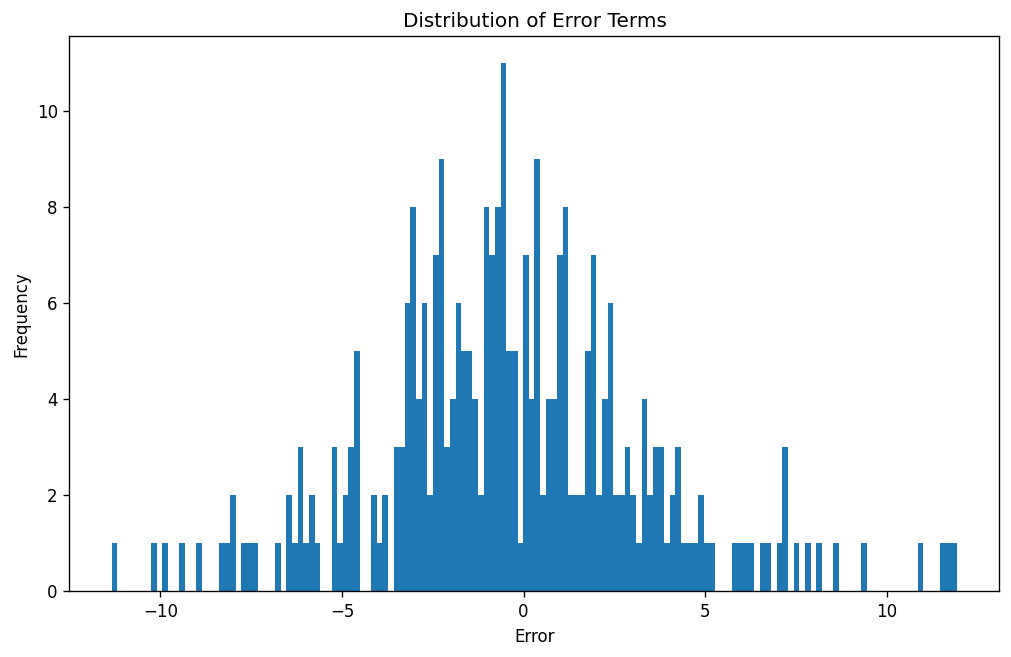

In [ ]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

/tmp/ipykernel_98/1721967797.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


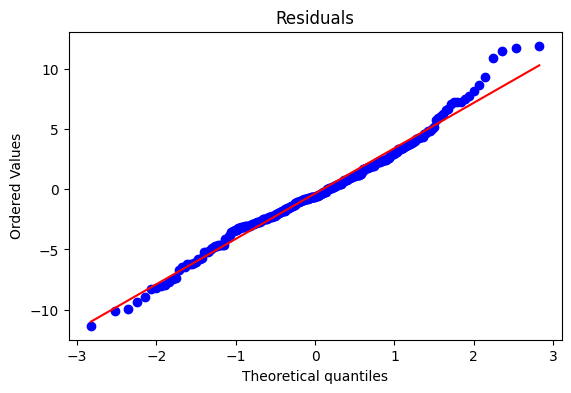

In [ ]:
plt.figure(figsize=(14,4))
sns.histplot(residuals['residuals'])
plt.title('Residuals')
plt.subplot(122)
stats.probplot(residuals['residuals'], dist="norm", plot=plt)
plt.title('Residuals')
plt.show()

### 4. Homoscedasticity

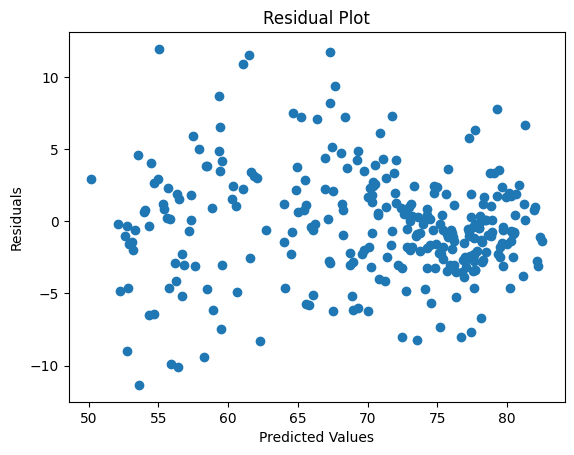

In [ ]:
plt.scatter(residuals['predicted values'],residuals['residuals'])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 5. Autocorrelation of Residuals

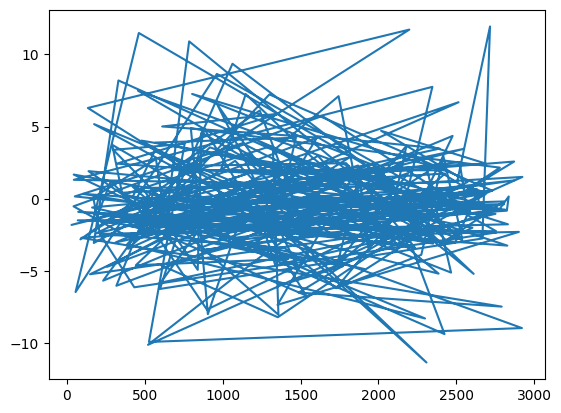

In [ ]:
plt.plot(residuals['residuals'])

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_statistic = durbin_watson(residuals['residuals'])

# Step 4: Interpret the Durbin-Watson statistic
if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation (residuals are positively correlated).")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation (residuals are negatively correlated).")
else:
    print("No significant autocorrelation (residuals are independent).")

# Display the Durbin-Watson statistic
print("Durbin-Watson statistic:", durbin_watson_statistic)

No significant autocorrelation (residuals are independent).
Durbin-Watson statistic: 1.9406235461151062


https://www.codecademy.com/article/data-transformations-for-multiple-linear-regression : After model fitting, if the residuals are skewed, it violates the assumption of normality and thus we may need to carry out log or cube root transformation of variables

https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a : In order to extract the most useful features, we can use PCA 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=988aa07a-6df2-468a-adeb-984cb08c5961' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>